__(1) Using the data sets you use in the second project, the regression project and the third project, the classification project, create regression and classification models with decision trees and determine the most appropriate parameter values for these models. You can use the cross-validation methods you learned in the previous section to find the ideal parameter.__

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

__Regression__

In [2]:
student_per = pd.read_csv("StudentsPerformance.csv")
student_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
student_per['is_male'] = pd.get_dummies(student_per['gender'] , drop_first = True)
student_per['test_pre_course'] = student_per['test preparation course'].replace({'none' : 0 , 
                                                                                 'completed' : 1})

In [4]:
X = student_per[['is_male' ,'reading score','test_pre_course','math score']]
Y = student_per['writing score']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 456)

In [5]:
tree_regression = DecisionTreeRegressor(random_state = 456)
tree_regression.fit(X_train , Y_train)

DecisionTreeRegressor(random_state=456)

In [6]:
print("Train accuracy score : {}".format(tree_regression.score(X_train , Y_train)))
print("Test accuracy score  : {}".format(tree_regression.score(X_test , Y_test)))

Train accuracy score : 0.9937064294367683
Test accuracy score  : 0.8872457522459185


In [7]:
train_pred = tree_regression.predict(X_train)
test_pred = tree_regression.predict(X_test)
print("Train RMSE : {}".format(rmse(train_pred , Y_train)))
print("Test  RMSE : {}".format(rmse(test_pred , Y_test)))

Train RMSE : 1.195390452251202
Test  RMSE : 5.2486770819999125


In [8]:
parameters = {'criterion' : ['mae' , 'mse'] ,
              'max_depth' : [1,2,3,4,5,6,7,8,9,10] ,
              'max_features' : [1,2,3,4,5,6,7,8,9,10]}
decision_tree = DecisionTreeRegressor(random_state = 456)
cv = GridSearchCV(estimator = decision_tree ,
                  param_grid = parameters , 
                  cv = 10)
cv.fit(X_train , Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=456),
             param_grid={'criterion': ['mae', 'mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [9]:
cv.best_params_

{'criterion': 'mse', 'max_depth': 5, 'max_features': 4}

In [10]:
tree_regression = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, max_features = 4 , random_state = 456)
tree_regression.fit(X_train , Y_train)

DecisionTreeRegressor(max_depth=5, max_features=4, random_state=456)

In [11]:
print("Train accuracy score : {}".format(tree_regression.score(X_train , Y_train)))
print("Test accuracy score  : {}".format(tree_regression.score(X_test , Y_test)))

Train accuracy score : 0.9253492211993426
Test accuracy score  : 0.9010044735921862


In [12]:
train_pred = tree_regression.predict(X_train)
test_pred = tree_regression.predict(X_test)
print("Train RMSE : {}".format(rmse(train_pred , Y_train)))
print("Test  RMSE : {}".format(rmse(test_pred , Y_test)))

Train RMSE : 4.116976625563573
Test  RMSE : 4.918030105376046


__Classification__

In [13]:
df = load_breast_cancer()
cancer = pd.DataFrame(df.data)
cancer.columns = df.feature_names
cancer['target'] = df.target

In [14]:
X = cancer.iloc[: , :-1]
Y = cancer['target']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 456)

In [15]:
tree = DecisionTreeClassifier(random_state = 1111)
tree.fit(X_train , Y_train)

DecisionTreeClassifier(random_state=1111)

In [16]:
print("Train accuracy score : {}".format(tree.score(X_train , Y_train)))
print("Test accuracy score  : {}".format(tree.score(X_test , Y_test)))

Train accuracy score : 1.0
Test accuracy score  : 0.9473684210526315


In [17]:
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)
print("TRAİN SET")
print(classification_report(Y_train , train_pred))
print("--" * 27)
print("TEST SET")
print(classification_report(Y_test , test_pred))

TRAİN SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       291

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.97      0.94      0.95        66

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [18]:
parameters = {'criterion' : ['entropy' ,  'gini'] ,
              'max_depth' : [1,2,3,4,5,6,7,8,9,10] ,
              'max_features' : [1,2,3,4,5,6,7,8,9,10]}
tree = DecisionTreeClassifier(random_state = 1111)
cv = GridSearchCV(estimator = tree ,
                  param_grid = parameters , 
                  cv = 10)
cv.fit(X_train , Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1111),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [19]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 6}

In [20]:
tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3 , max_features = 6 , random_state = 1111)
tree.fit(X_train , Y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       random_state=1111)

In [21]:
print("Train accuracy score : {}".format(tree.score(X_train , Y_train)))
print("Test accuracy score  : {}".format(tree.score(X_test , Y_test)))

Train accuracy score : 0.9626373626373627
Test accuracy score  : 0.9473684210526315


In [22]:
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)
print("TRAİN SET")
print(classification_report(Y_train , train_pred))
print("--" * 27)
print("TEST SET")
print(classification_report(Y_test , test_pred))

TRAİN SET
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       164
           1       0.96      0.98      0.97       291

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.97      0.94      0.95        66

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



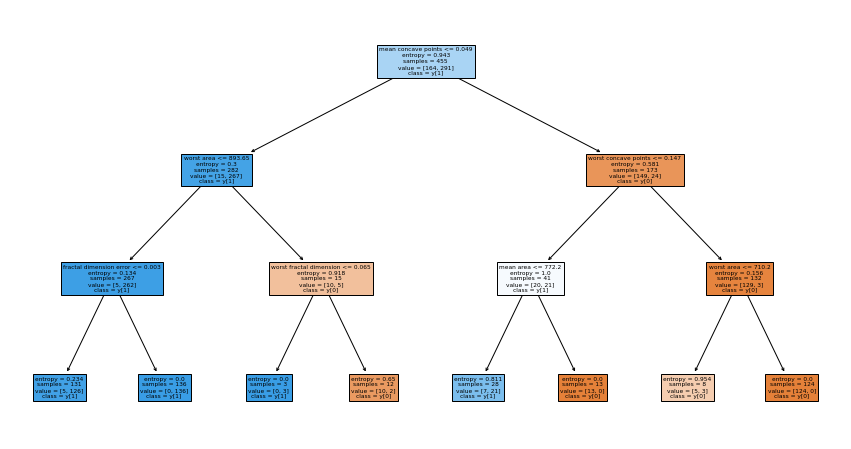

In [24]:
plt.figure(figsize = (15,8))
plot_tree(decision_tree = tree ,
          feature_names = X.columns , 
          class_names = True , 
          filled = True)
plt.show()

__(2) Using below given table answer questions a and b.__

__(a) Using the dataset above, we want to build a decision tree which classifies Y as T/F given the binary variables A,B,C. Draw the tree that would be learned by the greedy algorithm with zero training error. You do not need to show any computation.__

In [25]:
label_dict = {'A': ['F','T','T','T'],
              'B': ['F','F','T','T'],
              'C': ['F','T','F','T'],
              'Y':['F','T','T','F']}

label_dict = pd.DataFrame(label_dict)

In [26]:
label_dict = pd.get_dummies(label_dict , drop_first = True)
label_dict.columns = ['A','B','C','Y']

In [27]:
feature = label_dict[['A' , 'B' , 'C']]
target = label_dict['Y']
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(feature , target)

DecisionTreeClassifier(random_state=123)

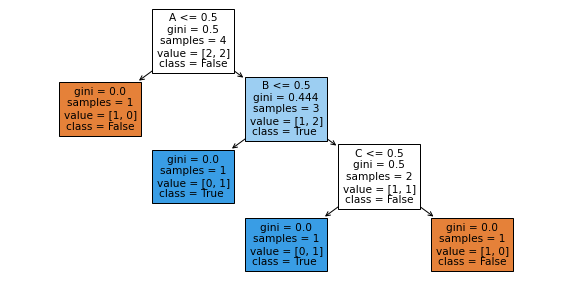

In [28]:
plt.figure(figsize = (10,5))
plot_tree(decision_tree = decision_tree ,
          feature_names = feature.columns , 
          class_names = ['False','True '], 
          filled = True)
plt.show()

__(b) Is this tree optimal (i.e. does it get zero training error with minimal depth)? Explain in less than two sentences. If it is not optimal, draw the optimal tree as well.__

Optimal bir ağaç değildir.Çünkü sonuç B ve C değişkeninin XOR'lanması ile elde adilir. A değişkeni sonucu etkilemez.

In [29]:
feature = label_dict[['B' , 'C']]
target = label_dict['Y']
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(feature , target)

DecisionTreeClassifier(random_state=123)

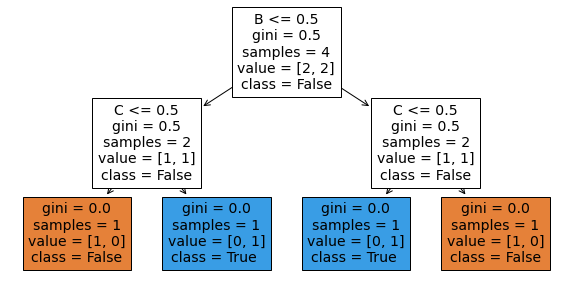

In [30]:
plt.figure(figsize = (10,5))
plot_tree(decision_tree = decision_tree ,
          feature_names = feature.columns , 
          class_names = ['False','True '], 
          filled = True)
plt.show()

__(3) We will use the dataset below to learn a decision tree which predicts if people pass machine learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or not they studied.__

In [31]:
dec_tree = {'GPA': ['L','L','M','M','H','H'],
            'Studies': ['F','T','F','T','F','T'],
            'Passed': ['F','T','F','T','T','T']}
dec_tree = pd.DataFrame(dec_tree)
dec_tree['GPA'].replace({'L':0 , 'M':1 , 'H':2} , inplace = True)
dec_tree[['Studies','Passed']] = pd.get_dummies(dec_tree[['Studies','Passed']] , drop_first = True)
#dec_tree.columns = ['GPA','Studies','Passed']
dec_tree

,GPA,Studies,Passed
0,0,0,0
1,0,1,1
2,1,0,0
3,1,1,1
4,2,0,1
5,2,1,1


In [32]:
X = dec_tree[['GPA','Studies']]
Y = dec_tree['Passed']
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
tree.fit(X , Y)

DecisionTreeClassifier(criterion='entropy', random_state=123)

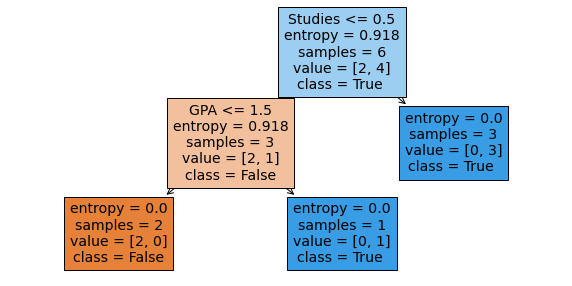

In [33]:
plt.figure(figsize = (10,5))
plot_tree(decision_tree = tree ,
          feature_names = X.columns , 
          class_names = ['False','True '], 
          filled = True)
plt.show()

__(a) What is the entropy H(Passed)?__

In [34]:
H = -((len(dec_tree[dec_tree['Passed'] == 0]))/(len(dec_tree['Passed'])) * 
      np.log2((len(dec_tree[dec_tree['Passed'] == 0]))/(len(dec_tree['Passed']))) + 
      (len(dec_tree[dec_tree['Passed'] == 1]))/(len(dec_tree['Passed'])) * 
      np.log2((len(dec_tree[dec_tree['Passed'] == 1]))/(len(dec_tree['Passed']))))
print("Entropy : {:.2f}".format(H))

Entropy : 0.92


__(b) What is the entropy H(Passed | GPA)?__

In [35]:
H =-(1/3)*((1/2)*np.log2(1/2)+(1/2)*np.log2(1/2))-(1/3)*((1/2)*np.log2(1/2)+(1/2)*np.log2(1/2))-(1/3)*(1*np.log2(1))
print("Entropy : {:.2f}".format(H))

Entropy : 0.67


__(c) What is the entropy H(Passed | Studied)?__

In [36]:
H = -(1/2)*((2/3)*np.log2(2/3) + (1/3)*np.log2(1/3)) - (1/2)*((3/3)*np.log2(3/3))
print("Entropy : {:.2f}".format(H))

Entropy : 0.46


__(4) How to prevent overfitting in decision tree?__

Pre-pruning tekniği ile decision tree modelinin max_depth, min_samples_leaf, min_samples_split hiperparametreleri, ağacın büyümesini erken durdurmak için ayarlanabilir. Böylelikle overfitting engellenmiş olur. 